<a href="https://colab.research.google.com/github/cotozelo/DataScience_Python_-_Data_ICMC/blob/main/Notebooks/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Nearest Neighbors (k-vizinhos mais próximos)

Usaremos scikit-Learn [https://scikit-learn.org/stable/]





## Imports

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

RANDOM_STATE = 13051980

## Dados

In [28]:
df_raw = pd.read_csv('dados_editados.csv')
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Faixa etaria
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Adulto
1,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adulto
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adulto
3,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adulto
4,6,0,3,"Moran, Mr. James",male,29.709916,0,0,330877,8.4583,Q,Adulto


## Pré-Processamento - Tratando dados

### Retirar colunas que não deve ser usadas na classificação

In [29]:
df_clening = df_raw.drop(columns=['PassengerId', 'Name', 'Ticket', 'Faixa etaria'])
df_clening.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,38.000000,1,0,71.2833,C
1,1,3,female,26.000000,0,0,7.9250,S
2,1,1,female,35.000000,1,0,53.1000,S
3,0,3,male,35.000000,0,0,8.0500,S
4,0,3,male,29.709916,0,0,8.4583,Q


### Label Encoding

No label encoding cada valor categórico da coluna se torna um valor numérico, no mesmo exemplo da coluna "pais", iriamos substituir os nomes dos paises por números, por exemplo Brasil=1, EUA=2 ... então continuariamos tendo uma única coluna, mas com vários valores.

### One-Hot Encoding

Cria uma coluna para cada possível valor que a variável assume. Perceba que isso pode gastar muita memória, pense em uma coluna "pais", ela contém 190 diferentes tipos de paises, se usarmos one-hot encoding nessa coluna, ela se transformaria em 190 colunas.

In [30]:
#vendo quais colunas não são numéricas, são as tipo "object"
df_clening.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [31]:
df_encoding = pd.get_dummies(df_clening)
df_encoding.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,1,38.000000,1,0,71.2833,1,0,1,0,0
1,1,3,26.000000,0,0,7.9250,1,0,0,0,1
2,1,1,35.000000,1,0,53.1000,1,0,0,0,1
3,0,3,35.000000,0,0,8.0500,0,1,0,0,1
4,0,3,29.709916,0,0,8.4583,0,1,0,1,0


In [32]:
df_encoding.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

### Normalização das colunas

* MinMaxScaler - [0, 1]

In [33]:
scaler = MinMaxScaler()
scaler.fit(df_encoding)
df_scaler = pd.DataFrame(scaler.transform(df_encoding), columns=df_scaler.columns)
df_scaler.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.434531,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.368056,0.000,0.0,0.016510,0.0,1.0,0.0,1.0,0.0


### Fim pré-processamento

In [34]:
df = df_scaler
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.434531,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.368056,0.000,0.0,0.016510,0.0,1.0,0.0,1.0,0.0


##Separando features de target

In [36]:
target = 'Survived'
features = list(df.columns)
features.remove(target)

print(f'Target: {target}')
print(f'Features: {features}')

Target: Survived
Features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [42]:
X_train, X_val, y_train, y_val = train_test_split(df[features], df[target], test_size=0.2, random_state=RANDOM_STATE)

print(f'X_train {X_train.shape}:\n{X_train}')
print(f'y_train {y_train.shape}:\n{y_train}')
print(f'X_val {X_val.shape}:\n{X_val}')
print(f'y_val {y_val.shape}:\n{y_val}')

X_train (710, 10):
     Pclass       Age  SibSp  ...  Embarked_C  Embarked_Q  Embarked_S
699     0.0  0.434531  0.000  ...         0.0         0.0         1.0
617     0.5  0.321438  0.000  ...         0.0         0.0         1.0
772     0.5  0.673285  0.125  ...         0.0         0.0         1.0
633     0.5  0.346569  0.000  ...         0.0         0.0         1.0
517     1.0  0.396833  0.000  ...         0.0         0.0         1.0
..      ...       ...    ...  ...         ...         ...         ...
757     0.0  0.409399  0.000  ...         0.0         0.0         1.0
884     0.0  0.233476  0.000  ...         0.0         0.0         1.0
5       0.0  0.673285  0.000  ...         0.0         0.0         1.0
870     1.0  0.585323  0.000  ...         0.0         0.0         1.0
374     1.0  0.271174  0.000  ...         0.0         0.0         1.0

[710 rows x 10 columns]
y_train (710,):
699    1.0
617    0.0
772    1.0
633    1.0
517    0.0
      ... 
757    1.0
884    1.0
5      0.0
8

## O Modelo - kNN

### Criando e Treinado o modelo

In [44]:
# Criando KNN com somente um vizinho
clf = KNeighborsClassifier(n_neighbors=1)

#Treinando o modelo com os dados de treino
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Aferindo o conjunto de validação no modelo


In [47]:
# prevendo os valores para o cojunto de validação
y_pred = clf.predict(X_val)
y_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1.])

In [52]:
acc = accuracy_score(y_true=y_val, y_pred=y_pred)
print(f'Acurácia: {acc}')

Acurácia: 0.7640449438202247


### Descobrir melhor vizinho

In [70]:
n_vizinho = np.arange(1, 11)

resultados = []

for k in n_vizinho:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X=X_train, y=y_train)
  
  y_pred = clf.predict(X_val)
  acc = accuracy_score(y_true=y_val, y_pred=y_pred)

  resultados.append(acc)
print(resultados)

[0.7640449438202247, 0.7696629213483146, 0.797752808988764, 0.7921348314606742, 0.7808988764044944, 0.7808988764044944, 0.7696629213483146, 0.7808988764044944, 0.7752808988764045, 0.7865168539325843]


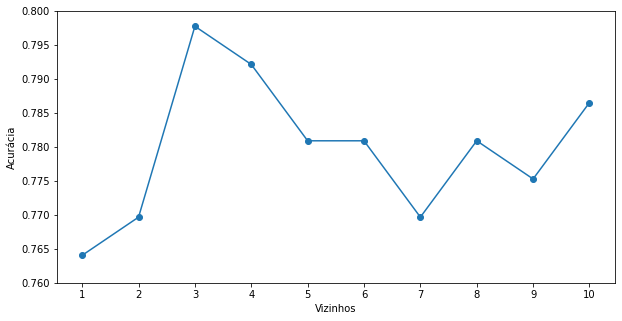

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(n_vizinho, resultados, '-o')
plt.xticks(n_vizinho)
plt.xlabel("Vizinhos")
plt.ylim((0.76, 0.8))
plt.ylabel('Acurácia')
plt.show()